<a href="https://colab.research.google.com/github/castudil/som-lstm/blob/main/som_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load all the CSV files form URL and merge into a single dataframe

In [ ]:
path = 'https://raw.githubusercontent.com/castudil/som-lstm/main/data/' # use your path
cities = ['chillan','curico','linares','los_angeles','osorno','puerto_montt','rancagua','san_fernando','talca'];
li = []
for i in cities:
  filename=path+i+'.csv'
  print('loading: '+filename)
  df = pd.read_csv(filename, index_col=None, header=0)
  # Convert the date column to a datestamp type
  df['date'] = pd.to_datetime(df['date'])
  # Set the date column as the index of your DataFrame meat
  df['city']=i
  df = df.set_index('date')
  #print(df.head(5))
  li.append(df)

print('consolidating into a single data frame.')
frame = pd.concat(li, axis=0, ignore_index=False)
print('displaying a random sample.')
print(frame.sample(n = 15))
print(frame.describe())
#print(frame['date'].dt.date.min()+ ' to '+ frame['date'].dt.date.max())
print(frame.index.min())
print(frame.index.max())


loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/chillan.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/curico.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/linares.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/los_angeles.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/osorno.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/puerto_montt.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/rancagua.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/san_fernando.csv
loading: https://raw.githubusercontent.com/castudil/som-lstm/main/data/talca.csv
consolidating into a single data frame.
displaying a random sample.
                         PM25          city
date                                       
2017-02-23 09:00:00    0.0000       chillan
2016-11-20 01:00:00   10.8200      rancagu

 

1.   The data considers nine different cities
2.   The data contains ~40K data rows
3.   No missing data
4.   PM2.5 information
5.   Data ranges from the year 2016 to 2020 









Plot the time series for one of the cities

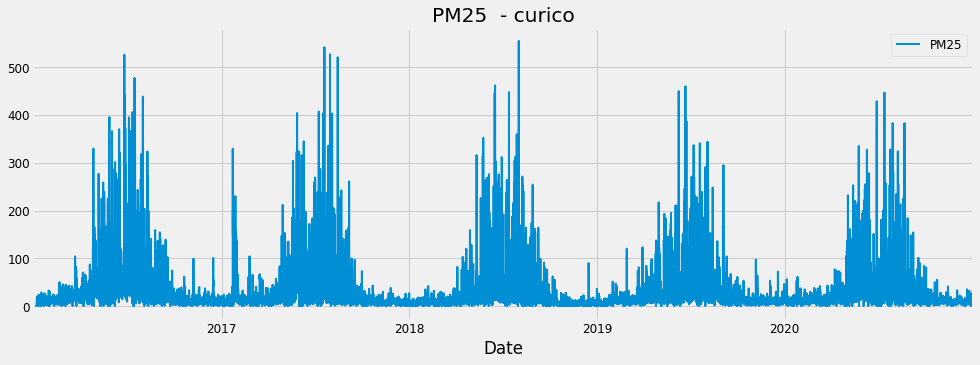

In [ ]:
def plot_city(city='curico'):
  plt.rcParams['figure.figsize'] = (15, 5)
  plt.style.use('fivethirtyeight')

  df=frame.loc[frame['city'] == city] # Sleecting Data for Curico

  # Plot time series dataset
  ax = df.plot(linewidth=2, fontsize=12);

  # Additional customizations
  ax.set_xlabel('Date');
  ax.set_title('PM25  - ' + city)
  ax.legend(fontsize=12);
  plt.show()

plot_city('curico')

1.   Most of the peaks occur in winter, these PM25 saturation obbey to a stational nature
2.   An exception occurs in the summer of 2017, perhaps attributed to fire forest. This information is corroborated from the [newspapers](https://ambiental.net/2017/02/el-incendio-mas-destructivo-en-la-historia-reciente-de-chile/ ), mentioning that fires as one of the most devasting of the recent years and affecting the center-south of Chile.
3. we corroborate the lalter situation by analyzing the case of 2017 in nearby cities
4. we are interested in wood stove combustion
5. also wer are focused on htree months of the winter season. (check the exact dates the [paper](https://ieeexplore.ieee.org/document/9037794)
6. TODO: the data must be cut, according to the dates specified in the previous paper)
7. there is also a [youtbe video](https://www.youtube.com/watch?v=QBOnjVfikTY) with a explanation of a relataed study (in spanish)



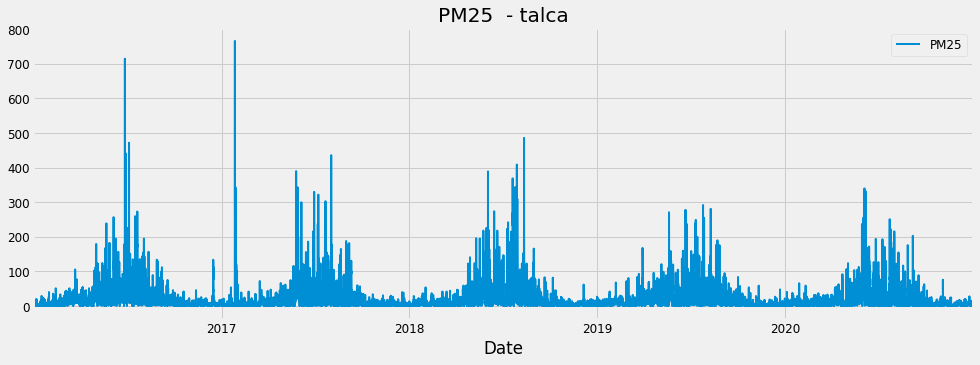

In [ ]:
plot_city('talca')

from the plot it is possible to see that the anomality was also captured in the same period of time.

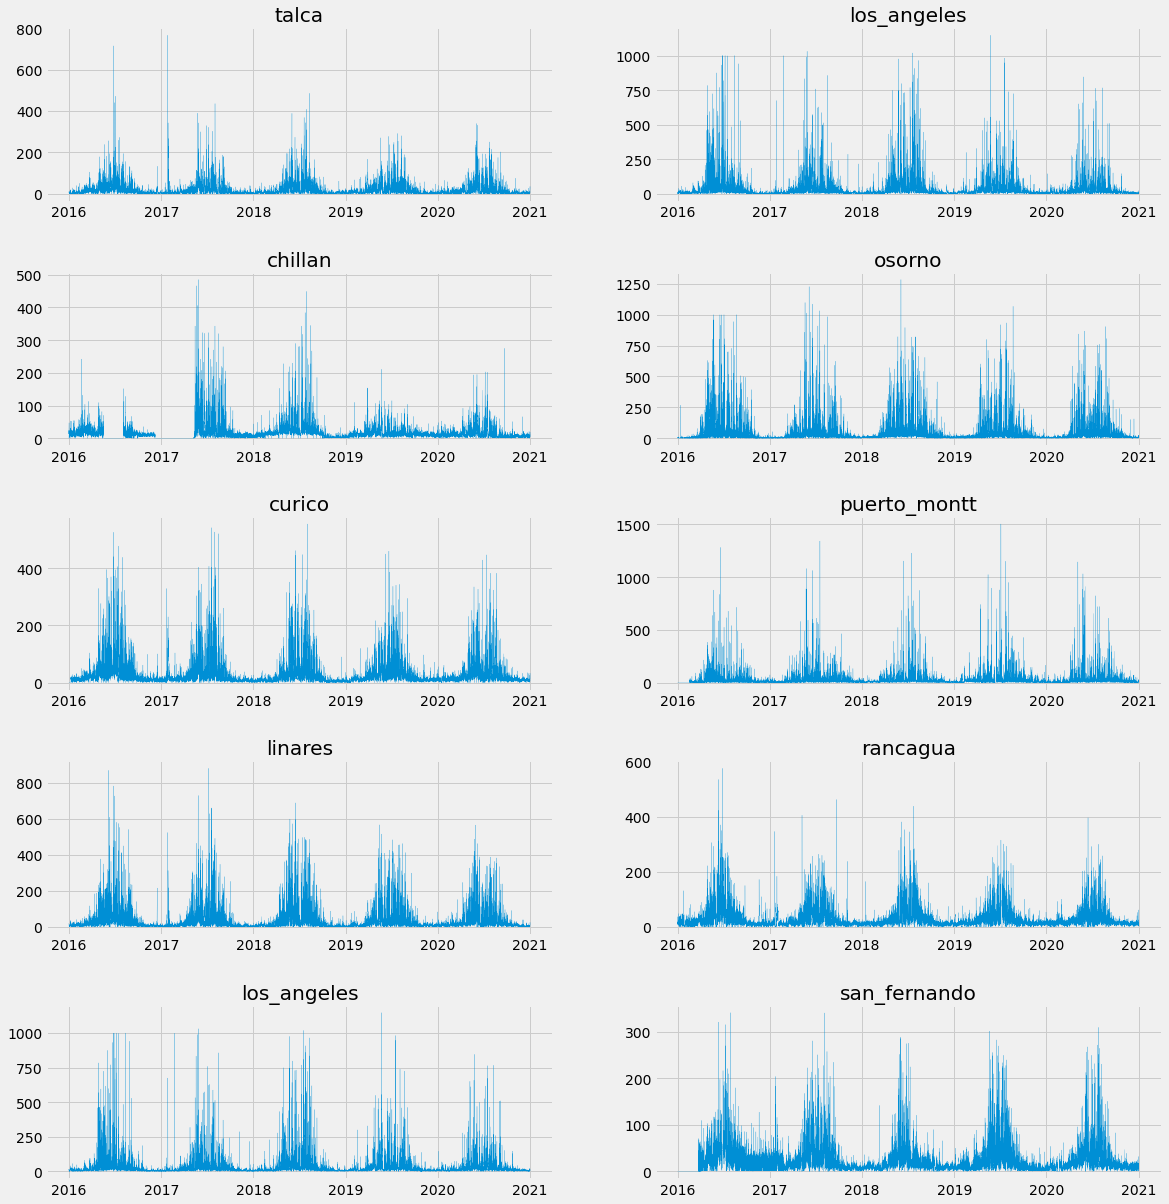

In [ ]:
cities = ['chillan','curico','linares','los_angeles','osorno','puerto_montt','rancagua','san_fernando']; ##TODO limpiar vectores repetidos, etc.
dfPrueba=frame.loc[frame['city'] == 'talca' ]
dfPrueba = dfPrueba.drop(['city'], axis=1)
dfPrueba.rename(columns={'PM25': 'talca'}, inplace=True)

for city in cities:
  dfCity=frame.loc[frame['city'] == city]
  dfPrueba[city] = dfCity['PM25']


figure, axes = plt.subplots(nrows=5, ncols=2,
                            figsize=(20,20))

cities = list(dfPrueba.columns)

for i in range(5):
  axes[i, 0].plot(dfPrueba[cities[i]], linewidth=0.2)
  axes[i, 0].set_title(cities[i])
  axes[i, 1].plot(dfPrueba[cities[i+4]], linewidth=0.2)
  axes[i, 1].set_title(cities[i+4])


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

plt.show()


# Create a facetted graph with 2 rows and 4 columns
#dfPrueba.plot(subplots=True,
#          layout=(2, 5),
#          sharex=False,
#          sharey=False,
#          colormap='viridis',
#         fontsize=8,
#         legend=False,
#         linewidth=0.2);
#plt.tight_layout();



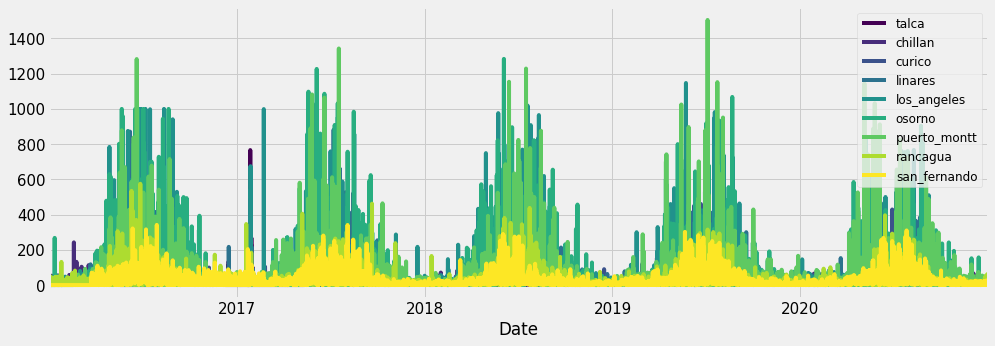

In [ ]:
# Plot time series dataset using the viridis color palette
### TODO: busca un reemplazo ara este plot, algo como 3d, donde muestre ne profuondudad las distintas series. aqui no se entiende
ax = dfPrueba.plot(colormap='viridis', fontsize=15);

# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

plt.show()

Comprobar la estacionalidad de los datos 

In [ ]:
  
#!pip install statsmodels


In [ ]:
from statsmodels.tsa.stattools import adfuller


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


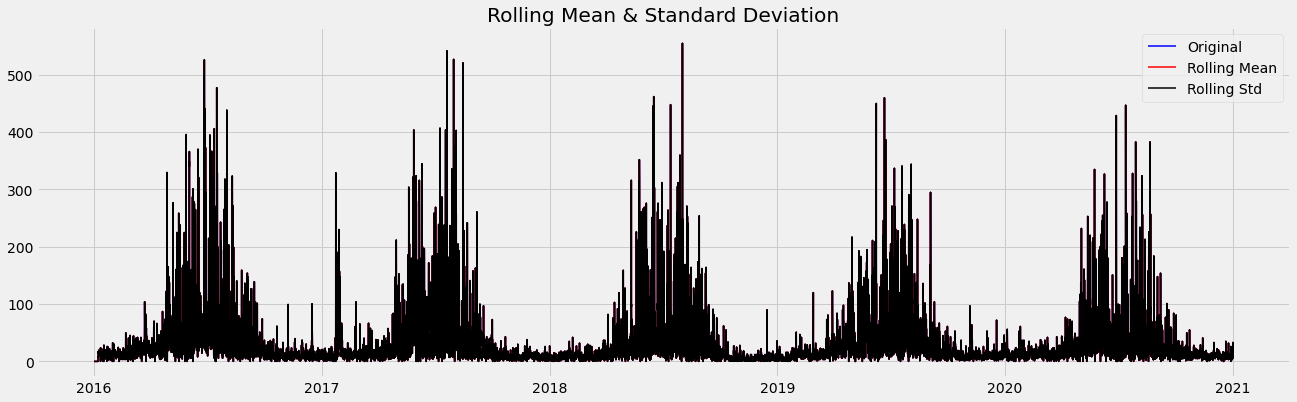

Results of Dickey-Fuller Test:
Test Statistic                -1.401113e+01
p-value                        3.712124e-26
#Lags Used                     5.400000e+01
Number of Observations Used    4.379200e+04
Critical Value (1%)           -3.430499e+00
Critical Value (5%)           -2.861606e+00
Critical Value (10%)          -2.566805e+00
dtype: float64


In [ ]:
def test_stationarity(city='curico'):
  timeseries = frame.loc[frame['city'] == city] # Sleecting Data for Curico
  #print(timeseries)

  # Determining rolling statistics
  rolmean = timeseries.rolling(12).mean()
  rolstd = timeseries.rolling(12).std()

  # Plot rolling statistics:
  plt.rcParams['figure.figsize'] = (20, 5)
  fig, ax = plt.subplots(figsize=(20,6))


  orig = ax.plot(timeseries.drop(['city'], axis=1) , color='blue',label='Original', linewidth=1.5)
  mean = ax.plot(timeseries.drop(['city'], axis=1), color='red', label='Rolling Mean',linewidth=1.5)
  std = ax.plot(timeseries.drop(['city'], axis=1), color='black', label = 'Rolling Std' , linewidth=1.5)

  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
    
  # Perform Dickey-Fuller test:
  print ('Results of Dickey-Fuller Test:')
  timeseries = timeseries.iloc[:,0].values
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

test_stationarity('curico')